<a href="https://colab.research.google.com/github/bingyulab/NumericalPDE/blob/main/Numerical_PDE_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminaries

In this notebook we explore some preliminary points before we begin actually exploring the implementation of the Galerkin finite element method in depth.

In particular we will discuss:

- A simple Helmholtz-type PDE in strong form.
- An analytical solution.
- The conversion from the strong form to the weak form, suitable for finite element analysis.
- The construction of a mesh on a simple domain.
- The construction of the lowest-order Lagrange finite element basis.
- The interpolation operator.
- A simple interpolation estimate.

> The notebook is not complete - your task will be to complete the missing
> parts and submit it as the first part of the coursework.

> The interactive elements of this notebook only work when the notebook is
> executed in a notebook environment.

## The Poisson problem

Find $u : \Omega := [0, 1] \to \mathbb{R}$ such that

$$
- \Delta u = f,
$$

with Dirichlet-type boundary conditions

$$
u(0) = 0, \quad u(1) = 0.
$$

### Exercise 1

Comment on the following aspects of this PDE:

1. Boundary value problem or initial value problem?
2. Linear or non-linear, and why?
3. For $k^2 > 0$, elliptic, parabolic or hyperbolic?
4. Neumann or Dirichlet problem?
5. Homogeneous or non-homogeneous boundary conditions?


# *Answer*

1. This is **Boundary value problem**. The equation is defined on the domain $\Omega = \left[ 0, 1 \right]$, and boundary conditions are specified at $x = 0$ and $x =1$. This classifies the problem as a boundary value problem. In contrast, an **initial value problem** involves time-dependent PDEs with data specified at an initial time $t = 0$.
2. Linear. Since the laplacian operator is linear operator, and both sides of the equation involve only linear combinations of the unknown function $u$ and its derivatives. Hence, the equation $-\Delta u = f$ is linear.
3. $K^{2} > 0$ is **Hyperbolic**. A second-order linear PDE in two variables, written in the form:
	$$
	Au_{x x} + Bu_{xy} + Cu_{yy} + Du_{x} + Eu_{y} + Fu + G = 0
	$$
	the classification depends on the **discriminant** $D = B^2 - 4AC$:
	- **Elliptic**: No time dependence, only spatial derivatives ($K^{2} = B^2 - 4AC < 0$).
	- **Parabolic**: Includes first-order time derivatives ($K^{2} = B^2 - 4AC = 0$).
	- **Hyperbolic**: Includes second-order time derivatives ($K^{2} = B^2 - 4AC > 0$).  
	However, for a poisson equation like $-u'' = f$, where $B = 0 \implies \Delta = -4AC$. So for $k^2 > 0 \implies \Delta < 0$, the equation is **elliptic**.
4. This is a **Dirichlet problem**. The boundary conditions requires the values of $u$ at $x=0$ and $x=1$. These are **Dirichlet boundary conditions**, where the function itself is specified. In contrast, **Neumann conditions** would specify the derivative $\frac{du}{dx}$ on the boundary.
5. Since both boundary values are zero (i.e., $u(0) = 0$ and $u(1) = 0$), the boundary conditions are called **homogeneous**. If either boundary condition were non-zero, the problem would be **non-homogeneous**.

### Exercise 2

Once we have finished, we would like to *verify* that our finite element code
can correctly solve a PDE. One straightforward way to do this is via the
method of manufactured solutions. We will invent a solution
$u_{\mathrm{exact}}$ that satisfies the Dirichlet boundary conditions, then
derive $f$ via substitution into the strong form of the PDE. On a sequence of
finer and finer meshes, we will solve our PDE using our finite element code
and check that our numerical solution converges to $u_{\mathrm{exact}}$ at
the *correct* rate. If it does, then it is likely we have a correct
implementation.

Let $u_{\mathrm{exact}} = \sin(cx)$ with $c$ an unknown positive constant.
Find the values for $c$ such that the Dirichlet boundary conditions are
satisfied.


# *Answer*

Assume the domain is 1D interval $\left[ 0, L \right]$ with Dirichlet boundary condition.
We have $\sin(c \cdot 0) = 0$ and $\sin(c \cdot L) = 0$. Then we obtain $c = \frac{n \pi}{L}, L \in \mathbb{N}$.

Find $f$ such that the strong form of the PDE is satisfied with
$u_{\mathrm{exact}} = \sin(cx)$.

# *Answer*


1. **Determine $c$ so that boundary conditions are satisfied.**
   We are given:
   $$
   u_{\text{exact}}(x) = \sin(cx), \quad x \in [0, L],
$$
   with **Dirichlet boundary conditions**:
   $$
   u(0) = \sin(0) = 0, \quad u(L) = \sin(cL) = 0.
   $$
   For $\sin(cL) = 0$, we must have:
   $$
   cL = n\pi \quad \text{for some } n \in \mathbb{N}.
   $$
   Hence,
   $$
   c = \frac{n\pi}{L}, \quad n \in \mathbb{N}.
   $$
2. **Compute $f$ such that $-u'' = f$.**
   Given $u(x) = \sin\left(\frac{n\pi x}{L}\right)$, we compute:
   $$
   u''(x) = -\left(\frac{n\pi}{L}\right)^2 \sin\left(\frac{n\pi x}{L}\right).
   $$
   Thus,
   $$
   -u''(x) = \left(\frac{n\pi}{L}\right)^2 \sin\left(\frac{n\pi x}{L}\right).
   $$
   So the manufactured right-hand side is:
   $$
   f(x) = \left(\frac{n\pi}{L}\right)^2 \sin\left(\frac{n\pi x}{L}\right).
   $$
When $L = 1$, this formula becomes $f(x) = \left(n\pi\right)^2 \sin\left(n\pi x\right)$.

### Exercise 3

Adjust the code below to plot the solution $u_{\mathrm{exact}}$ for a fixed
value of $c$ such that the boundary conditions are satisfied. Extend the code
to also plot the $f$ you derived previously. Add axis labels and enable a
legend for the graph.

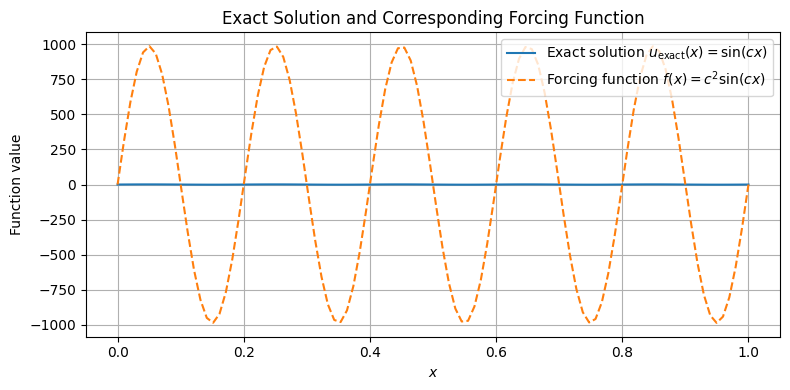

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Choose c such that sin(c*0) = sin(c*1) = 0 ⇒ c = nπ
c = 10 * np.pi  # satisfies u(0) = u(1) = 0

x = np.linspace(0.0, 1.0, num=100)
u_exact = np.sin(c * x)
f = c**2 * np.sin(c * x)  # from f = -u'' = c^2 * sin(c x)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, u_exact, label=r"Exact solution $u_{\mathrm{exact}}(x) = \sin(c x)$")
plt.plot(x, f, label=r"Forcing function $f(x) = c^2 \sin(c x)$", linestyle='--')
plt.xlabel(r"$x$")
plt.ylabel("Function value")
plt.title("Exact Solution and Corresponding Forcing Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Exercise 4

Derive the weak formulation of the partial differential equation. You will
need the following integration by parts result.

For functions $u, v \in H^1(\Omega)$ the following integration by parts
result holds

$$
\int_{0}^{1} -u'' v \; \mathrm{d}x = [-u' v]_0^1 + \int_0^1 u' v' \; \mathrm{d}x.
$$

# *Answer*


Let $v \in H^1_0(0, 1)$ be a test function (i.e., $v(0) = v(1) = 0$). Multiply both sides of the PDE by $v(x)$ and integrate over $(0, 1)$:
$$
\int_0^1 (-u'')(x) \cdot v(x) \, dx = \int_0^1 f(x) \cdot v(x) \, dx
$$

Apply **integration by parts** (no boundary term since $v(0) = v(1) = 0$):
$$
\int_0^1 u'(x) v'(x) \, dx = \int_0^1 f(x) v(x) \, dx
$$

**Find** $u \in H_0^1(0, 1)$ such that:
$$
\int_0^1 u'(x) v'(x) \, dx = \int_0^1 f(x) v(x) \, dx \quad \forall v \in H_0^1(0, 1)
$$

## Building finite element basis functions

### The mesh

The mesh is a discretisation of the domain $\Omega$ into cells.

A uniform mesh $\mathcal{T}_h$ of $\Omega$ is a partitioning of the mesh
constructed from $N$ disjoint cells $K_i$

$$
\mathcal{T}_h = \{ K_i = (x_i, x_{i+1}) \; | \; i = 0, 1, \dots, N-1 \},
$$

with $N + 1$ vertices

$$
0 = x_0 < x_1 < \cdots < x_N = 1,
$$

and fixed mesh size $h = x_{i+1} - x_i = 1/(N - 1)$. Note that

$$
\bigcup K_i = \Omega.
$$

### The lowest-order Lagrange finite element space

The $P_1$ finite element space is defined as

$$
V_h = \{ v_h \in C^0(\Omega) : v_h|_{K_i} \text{ is linear for all } K_i \in \mathcal{T}_h \}.
$$

Each function $v_h \in V_h$ is $C^0$ continuous and piecewise linear on the mesh.

### Explicit piecewise definition of the basis functions

On $ K_i = (x_i, x_{i+1})$ the global piecewise definition

$$
\varphi_i(x) =
\begin{cases}
\dfrac{x_{i+1} - x}{x_{i+1} - x_i}, & x \in [x_i, x_{i+1}], \\[10pt]
0, & \text{otherwise,}
\end{cases}
$$

and

$$
\varphi_{i+1}(x) = \begin{cases}
\dfrac{x - x_i}{x_{i+1} - x_i}, & x \in [x_i, x_{i+1}], \\[10pt]
0, & \text{otherwise.}
\end{cases}
$$

Each $\varphi_j$ is linear on the two elements adjacent to $x_j$ and zero elsewhere.

### Nodal basis property

The standard hat functions $\{ \varphi_j \}_{j=0}^N$ form a basis for $V_h$.
Each basis function $\varphi_j$ has the property

$$
\varphi_j(x_i) = \delta_{ij} = \begin{cases}
1 & \text{if } i = j, \\[6pt]
0 & \text{otherwise.}
\end{cases}
$$

### Visualisation

In the next cell we show a plot of the finite element basis functions on an adjustable mesh.

Begin by dragging the slider to $N = 2$. The endpoints of the single cell
$K_0$ are shown by the grey vertical lines at $x = 0$ and $x = 1$. The
coloured circles along the lower axis denote the location of the two *degrees
of freedom* $x_j$ associated with the basis functions $\varphi_j$. The two
linear basis functions, along with each associated degree of freedom, are
plotted in the same colour.

> The $N = 2$ case is similar to the situation when we construct the local
finite element basis functions later on in the course, and then pull back the
integral from each global cell $K_j = (x_j, x_{j + 1})$ to the local cell
$\hat{K} = (0, 1)$.

Experiment with increasing $N$. Match up what you see in the plot with the
equations and properties discussed in the previous paragraphs.

In [2]:
def generate_mesh(N):
    """Generate a uniform mesh on [0, 1] with N nodes."""
    return np.linspace(0.0, 1.0, N)


def p1_basis_function(x, nodes, j):
    """Evaluate the j-th P1 basis function at points x."""
    phi = np.zeros_like(x)
    if j > 0:
        left = (x >= nodes[j - 1]) & (x <= nodes[j])
        phi[left] = (x[left] - nodes[j - 1]) / (nodes[j] - nodes[j - 1])
    if j < len(nodes) - 1:
        right = (x >= nodes[j]) & (x <= nodes[j + 1])
        phi[right] = (nodes[j + 1] - x[right]) / (nodes[j + 1] - nodes[j])
    return phi


def plot_p1_basis(N=2):
    """Plot all P1 basis functions on a mesh with N nodes."""
    resolution = 500
    nodes = generate_mesh(N)
    x = np.linspace(0, 1, resolution)

    plt.figure()
    for j in range(N):
        phi = p1_basis_function(x, nodes, j)
        (line,) = plt.plot(x, phi, label=f"$\\varphi_{j}(x)$")
        plt.scatter(nodes[j], 0.0, color=line.get_color())

    # Plot vertical lines at element boundaries and label elements
    for i in range(N - 1):
        plt.axvline(nodes[i], color="gray", linestyle="-", alpha=0.6)
        plt.axvline(nodes[i + 1], color="gray", linestyle="-", alpha=0.6)
        # Place label in the middle of the element
        mid_point = (nodes[i] + nodes[i + 1]) / 2
        plt.text(mid_point, -0.1, f"$K_{{{i}}}$", ha="center", va="center", fontsize=10)

    plt.xlabel(r"$x$", fontsize=12)
    plt.ylabel(r"$\varphi_j(x)$", fontsize=12)
    plt.xticks(nodes)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend(loc="upper right", fontsize=9)
    plt.show()

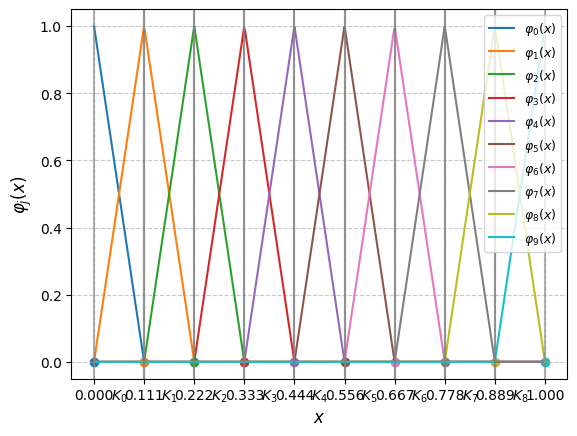

In [3]:
plot_p1_basis(10)

### The interpolation operator $I_h$

The $P_1$ interpolation operator $I_h: C^0(\Omega) \to V_h$ is defined as:

$$
(I_h u)(x) = \sum_{j=0}^N u(x_j) \varphi_j(x),
$$

where $u(x_j)$ are the nodal values of $u$.

> The nodal values of the $P^1$ space are associated with the vertices of the
> mesh. In this course we do not pay any particular care to the association
> between the topological entities of the mesh (e.g. vertices) and the nodes
> (or degrees of freedom) of the finite element space $V_h$. We also do not
> strictly separate the topology of the mesh from its geometry. These
> precisions will be made in the Numerical Methods for Variational Problems
> course in Semester 3.

The interpolation operator has the following properties:

1. Exact (to machine precision) reproduction of linear functions, i.e. if $u$
is linear, then $I_h u = u$ everywhere.
2. $I_h u$ is $C^0$ on $\Omega$.
3. The basis is local in a spatial sense - the value of $(I_h u)(x)$ depends
   only on $u(x_j)$ at the nearest nodes.
4. The construction of $\varphi_j$ ensures that the interpolant $I_h u$
   matches $u$ at the vertices, i.e. $(I_h u)(x_j) = u(x_j)$.

The interpolant of $u$ can be written in terms of the two local basis
functions

$$
I_h u(x) = u(x_i)\varphi_i(x) + u(x_{i+1})\varphi_{i+1}(x),
$$

and substituting the previous definition of the basis

$$
I_h u(x) = u(x_i) \frac{x_{i+1} - x}{x_{i+1} - x_i} \;+\; u(x_{i+1}) \frac{x - x_i}{x_{i+1} - x_i}, \quad x \in [x_i, x_{i+1}].
$$

### Exercise 5

The interpolation error estimate states that the error between the exact
solution $u_{\mathrm{exact}} := u \in H^2$ and its interpolant $I_h u \in
V_h$ is given by

$$
\lVert u - I_h u \rVert_{H^1} \leq C h | u |_{H^2}
$$

where $\lVert \cdot \rVert_{H^1}^2$ is the standard $ H^1 $ norm

$$
\lVert v \rVert_{H^1} = \lVert v \rVert_{L^2}^2 + \lVert \nabla v \rVert_{L^2}^2,
$$

and $ | \cdot |_{H^2} $ is the $H^2$-seminorm

$$
    | u |_{H^2} = \left( \int_0^1 | u''(x) |^2 dx \right)^{1/2}.
$$

For the exact solution given above, derive an explicit bound for the
interpolation error in terms of the parameters $C$, $h$, and $c$. In words,
comment on the dependence between the parameters and the error, and give an
intepretation of the result.

> The extended version of the previous result, called a finite element error
> bound, will be covered in the theoretical part of the course. The finite
> element error bound states that the error between the exact solution and the
> linear Lagrange finite element solution $u_h$ is given by
>
> $$
  \lVert u - u_h \rVert_{H^1} \leq C h | u |_{H^2}
  $$
>
> which is of a very similar form to the interpolation error estimate we just
> saw. Note that $C$ is a different positive constant to the one you have just
> seen - this applies throughout the course!

# *Answer*

**Step 1: Compute the $H^{2}$-seminorm of $u(x) = \sin(c\pi x)$**

1. First derivative:
$$
u^{\prime}(x) = c \pi \cos(c \pi x)
$$
2. Second derivative:
$$
u^{\prime\prime} = -c^{2}\pi^{2} \sin(c \pi x)
$$
3. Compute the seminorm:
$$
\begin{align}  
  & \lvert u \rvert _{h^{2}}^{2} = \int_0^1 \lvert u(x)^{\prime \prime} \rvert^{2} dx = \int _{0}^{1} (-c^{2}\pi^{2} \sin(c \pi x))^{2} \, dx \\  
 & = c^{4}\pi^{4}\int_{0}^{1} \sin ^{2}(c\pi x) dx = c^{4}\pi^{4} \int_{0}^{1} \frac{1-\cos (2c\pi x)}{2}dx \\  
 & = c^{4}\pi^{4} \left( \frac{1}{2} - \frac{\sin(2c\pi x)}{4 c \pi x} \mid_{0}^{1}\right) \\  
 & = \frac{c^{4}\pi^{4}}{2}  
\end{align}
$$
Taking the square root, we obtain:
$$
\lvert u \rvert _{h^{2}}= \frac{c^{2}\pi^{2}}{\sqrt{ 2 }}
$$

**Step 2: Derive the Explicit Error Bound**  

Substitute the result into the error estimate:
$$
\lVert u - u_h \rVert_{H^1} \leq C h | u |_{H^2} = Ch \frac{c^{2}\pi^{2}}{\sqrt{ 2 }}
$$
Thus, the interpolation error in the $H^{1}$-norm satisfies
$$
\lVert u - u_h \rVert_{H^1} \leq Ch \frac{c^{2}\pi^{2}}{\sqrt{ 2 }}
$$
We can know following fact from this formula:
* The error **increases quadratically** with $c$: as $c$ increases, the function $u(x) = \sin(c\pi x)$ oscillates more, making it harder for a linear interpolant to capture its behavior.

* The error is **linearly proportional** to the mesh size $h$: refining the mesh (decreasing $h$) improves the interpolation accuracy.

* The constant $C$ depends on the interpolation operator and element shapes but not on $h$ or $c$. It encapsulates properties of the finite element space $V_h$.


### Exercise 6

Having seen the interpolation error estimate is is helpful to play around
with the parameters $c$, controlling how oscillatory our solution $u$ is, and
$h = 1/N$ and simply observe how the interpolant $I_h u$ changes.

Matplotlib already implements the linear interpolant; you give it an array of
values $(I_h u)(x_j)$ of the function $u$ at the nodes $x_j$ and it will plot
the linear interpolant $I_h u$.

In the box below the plot explain your observations and relate them back to
the interpolation error estimate we just saw.

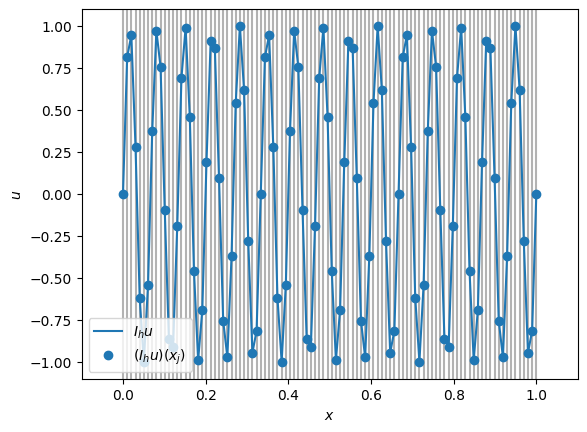

In [4]:
def u_exact(N: int = 2, c: int = 1, plot_fine=False):
    nodes = np.linspace(0.0, 1.0, num=N)
    # This next statement is precisely the nodal values of the interpolant of u
    Iu = np.sin(c * np.pi * nodes)

    for node in nodes:
        plt.axvline(node, color="gray", linestyle="-", alpha=0.6)

    (line,) = plt.plot(nodes, Iu, "-", label="$I_h u$")
    plt.plot(nodes, Iu, "o", color=line.get_color(), label="$(I_h u)(x_j)$")
    if plot_fine:
        xs = np.linspace(0.0, 1.0, num=500)
        y = np.sin(c * np.pi * xs)
        plt.plot(xs, y, "-", label="$u$")

    plt.ylim(-1.1, 1.1)
    plt.xlim(-0.1, 1.1)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$u$")

    plt.legend(loc="lower left")

u_exact(N=100, c=30, plot_fine=False)

# *Answer*


The interpolation error estimate demonstrates that the accuracy of the linear interpolant is strongly influenced by two factors: the mesh size $h$ and the oscillatory of the exact solution (quantified by $c$). A finer mesh (smaller $h$) leads to a smaller error, while a more oscillatory solution (larger $c$) requires a finer mesh to achieve the same level of accuracy. This interplay is critical in finite element analysis, where both the **discretization parameters** and **the properties of the solution** determine the overall error.

When changing the parameters $c$ and $h = 1/N$ in the plotting code:
- **For parameter $c$:**  
As $c$ increases, the function $u(x)=\sin(c\pi x)$ oscillates more frequently. The linear interpolant $I_h u$, which only uses the nodal values, will capture the overall trend but miss the finer oscillatory behavior. This leads to a larger discrepancy between $u$ and $I_h u$ in the regions where the function varies rapidly.

- **For parameter $h$:**  
A smaller $h$ (i.e., a larger $N$) results in more nodes, and hence the linear interpolant becomes a better approximation of the exact solution. According to the error bound, the error decreases linearly with $h$.

- **Relation to the Error Estimate:**  
	- For fixed $c$, halving $h$ approximately halves the error.
	- For fixed $h$, increasing $c$ (making $u$ more oscillatory) increases the error roughly in proportion to $c^2$.